# PanSTARRS - WISE crossmatch: Load and filter catalogues

First step in the maximum likelihood crossmatch between PanSTARRS and WISE.

The software depends on numpy, astropy, pandas and wquantiles (which can be installed using pip).

The input data is expected to be in a directory called "data".

In [2]:
import numpy as np
from astropy.table import Table
from wquantiles import median as wmedian
import os

In [3]:
from mltier1 import describe, Field

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This is the object representing the region considered. It can be used to filter the catalogues and to compute the area.

In [5]:
field = Field(170.0, 190.0, 45.5, 56.5)

In [6]:
field_full = Field(160.0, 232.0, 42.0, 62.0)

## PanSTARRS

### Load PanSTARRS catalogue

In [8]:
base_panstarrs = Table.read(os.path.join("data", "hetdex_full_jsabater.fits"))

In [9]:
len(base_panstarrs)

26798085

The original PanSTARRS catalogue had ~4.4M sources but the catalogue that covers all the area has ~27M sources. The columns are the following:

In [10]:
np.array(base_panstarrs.colnames)

array(['objID', 'raStack', 'decStack', 'raStackErr', 'decStackErr',
       'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'nStackDetections',
       'nDetections', 'qualityFlag', 'gFApFlux', 'gFApFluxErr', 'gFlags',
       'rFApFlux', 'rFApFluxErr', 'rFlags', 'iFApFlux', 'iFApFluxErr',
       'iFlags', 'zFApFlux', 'zFApFluxErr', 'zFlags', 'yFApFlux',
       'yFApFluxErr', 'yFlags', 'gPSFMag', 'gPSFMagErr', 'rPSFMag',
       'rPSFMagErr', 'iPSFMag', 'iPSFMagErr', 'zPSFMag', 'zPSFMagErr',
       'yPSFMag', 'yPSFMagErr'],
      dtype='<U16')

### Description of the data

The coordinates of the PanSTARRS data are:

In [11]:
describe(base_panstarrs['decMean'])
describe(base_panstarrs['raMean'])
describe(base_panstarrs['decStack'])
describe(base_panstarrs['raStack'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


51.189 +/- 5.696; median: 50.804; limits: [42.000, 62.000]; N=26798085 (0 NaN; 0 masked)
195.651 +/- 21.028; median: 195.325; limits: [160.000, 232.000]; N=26798085 (0 NaN; 0 masked)
51.189 +/- 5.696; median: 50.804; limits: [42.000, 62.000]; N=26798085 (0 NaN; 0 masked)
195.651 +/- 21.028; median: 195.325; limits: [160.000, 232.000]; N=26798085 (0 NaN; 0 masked)


In [12]:
describe(base_panstarrs['iFApFlux'])
describe(base_panstarrs['iFApFluxErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:4125: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  part.partition(kth)


-34.027 +/- 81687.242; median: 0.000; limits: [-243164992.000, 31991.801]; N=26798085 (214362 NaN; 197261 masked)


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:4125: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  part.partition(kth)


7.569 +/- 44382.885; median: 0.000; limits: [-999.000, 132118000.000]; N=26798085 (214362 NaN; 197261 masked)


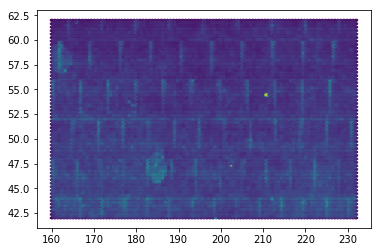

In [13]:
hexbin(base_panstarrs["raMean"], base_panstarrs["decMean"]);

#### Areas without forced photometry

There are some areas without forced photometry data. We emailed the responsibles of the archive and they are investigating the origing of the issue.

The next figure shows the distribution of the sources lacking forced photometry measurements.

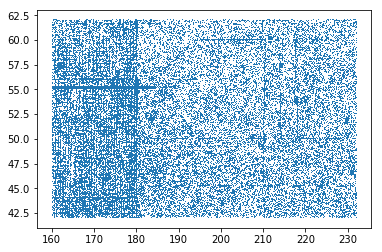

In [14]:
plot(base_panstarrs["raMean"][np.isnan(base_panstarrs['iFApFlux'])],
     base_panstarrs["decMean"][np.isnan(base_panstarrs['iFApFlux'])],
     ls="", marker=",");

The next figure is the distribution of sources with wrong values for the forced photometry in i-band but which were measured.

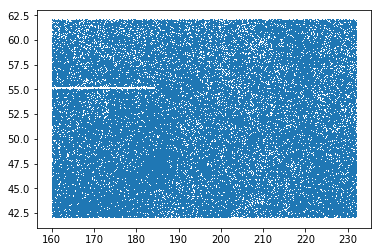

In [15]:
plot(base_panstarrs["raMean"][base_panstarrs['iFApFlux'] == -999.],
     base_panstarrs["decMean"][base_panstarrs['iFApFlux'] == -999.],
     ls="", marker=",");

#### Positional offsets
Between the Mean and Stacked computed positions

In [16]:
offset_dec = base_panstarrs['decMean']-base_panstarrs['decStack']
offset_ra = base_panstarrs['raMean']-base_panstarrs['raStack']

In [17]:
describe(offset_ra, decimals=7)
describe(offset_dec, decimals=7)

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.0000215 +/- 0.0000992; median: -0.0000166; limits: [-0.0011833, 0.0011232]; N=26798085 (0 NaN; 0 masked)
-0.0000165 +/- 0.0000625; median: -0.0000135; limits: [-0.0008131, 0.0006327]; N=26798085 (0 NaN; 0 masked)


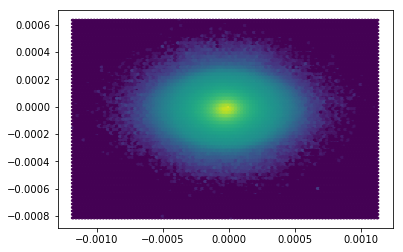

In [18]:
hexbin(offset_ra, offset_dec, bins='log')

#### Stacked magnitudes

In [19]:
describe(base_panstarrs['gPSFMag'])
describe(base_panstarrs['gPSFMagErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-51.497 +/- 265.396; median: 22.942; limits: [-999.000, 40.539]; N=26798085 (0 NaN; 1949449 masked)
-10.498 +/- 674.106; median: 0.160; limits: [-999.000, 1851880.000]; N=26798085 (0 NaN; 326108 masked)


In [20]:
describe(base_panstarrs['rPSFMag'])
describe(base_panstarrs['rPSFMagErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-27.932 +/- 220.360; median: 22.273; limits: [-999.000, 38.125]; N=26798085 (0 NaN; 1312309 masked)
-10.047 +/- 270.611; median: 0.096; limits: [-999.000, 990037.000]; N=26798085 (0 NaN; 291954 masked)


In [21]:
describe(base_panstarrs['iPSFMag'])
describe(base_panstarrs['iPSFMagErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-26.963 +/- 217.074; median: 21.742; limits: [-999.000, 42.170]; N=26798085 (0 NaN; 1272900 masked)
-9.353 +/- 1455.112; median: 0.061; limits: [-999.000, 7258990.000]; N=26798085 (0 NaN; 280293 masked)


In [22]:
describe(base_panstarrs['zPSFMag'])
describe(base_panstarrs['zPSFMagErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-34.446 +/- 231.757; median: 21.419; limits: [-999.000, 43.205]; N=26798085 (0 NaN; 1462581 masked)
-5.390 +/- 15467.481; median: 0.094; limits: [-999.000, 56476800.000]; N=26798085 (0 NaN; 290942 masked)


In [23]:
describe(base_panstarrs['yPSFMag'])
describe(base_panstarrs['yPSFMagErr'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-58.133 +/- 272.883; median: 21.076; limits: [-999.000, 38.646]; N=26798085 (0 NaN; 2079256 masked)
-8.936 +/- 1539.609; median: 0.188; limits: [-999.000, 6608540.000]; N=26798085 (0 NaN; 305094 masked)


#### Wrong magnitudes

In [24]:
len(base_panstarrs[
        ((base_panstarrs["gPSFMag"] == - 999.) & 
         (base_panstarrs["rPSFMag"] == - 999.) &
         (base_panstarrs["iPSFMag"] == - 999.) &
         (base_panstarrs["zPSFMag"] == - 999.) &
         (base_panstarrs["yPSFMag"] == - 999.))])

18707

### Filter the catalogue

Filter the PanSTARRS catalogue by selection the area in the field and removing wrong magnitudes

In [25]:
new_panstarrs = field_full.filter_catalogue(
    base_panstarrs[
      ((base_panstarrs["gPSFMag"] != - 999.) | 
       (base_panstarrs["rPSFMag"] != - 999.) |
       (base_panstarrs["iPSFMag"] != - 999.) |
       (base_panstarrs["zPSFMag"] != - 999.) |
       (base_panstarrs["yPSFMag"] != - 999.))], 
    colnames=("raMean", "decMean"))

In [26]:
len(new_panstarrs)

26779378

Free memory

In [27]:
del base_panstarrs

### Estimate I-band magnitudes if they are undetected

In some cases the i-band magnitude is missing but we could derive it from the values of the other magnitude bands.

#### Pandas auxiliary catalogue

First we will create an auxiliary Pandas catalogue that will help us to work with the data.

In [29]:
panstarrs = new_panstarrs.to_pandas()

In the auxiliary catalogue we will use NaN to define the missing values for the magnitudes.

In [30]:
all_bands = ["g", "r", "i", "z", "y"]

In [31]:
for band in all_bands:
    panstarrs.loc[(panstarrs["%sPSFMag"%band] == -999.), "%sPSFMag"%band] = np.nan
    panstarrs.loc[(panstarrs["%sPSFMagErr"%band] == -999.), "%sPSFMagErr"%band] = np.nan

#### Missing values

The number of missing i-band values is:

In [32]:
len(panstarrs[np.isnan(panstarrs["iPSFMag"])])

1254193

We get the statistical properties for each of the other bands with data

In [33]:
bands = ["g", "r", "z", "y"]

In [34]:
def get_diff(band):
    assert band in bands
    column = "{}PSFMag".format(band)
    mask = ((panstarrs[column] != -999.) & 
            (panstarrs["iPSFMag"] != -999.) &
            (~np.isnan(panstarrs[column])) & 
            (~np.isnan(panstarrs["iPSFMag"])))
    return panstarrs[mask][column] - panstarrs[mask]["iPSFMag"]

In [35]:
band_properties = {}
for band in bands:
    diff = get_diff(band)
    band_properties.update({band: {"mean": diff.mean(), 
                                   "median": np.median(diff),
                                   "std": diff.std(),
                                   "n": len(diff)}
                     })
    if True:
        print("{} {n} {mean:7.4f} {std:7.4f} {median:7.4f}".format(band, **band_properties[band]))

g 24033983  1.3822  1.1033  1.3089
r 24767870  0.5701  0.7244  0.5020
z 24694850 -0.2562  0.5951 -0.2604
y 24101118 -0.4327  0.7664 -0.4610


Now we compute the interpolated value of "i" for the missing data. The computed values, including the measured ones, are entered in a column named "i".

In [36]:
aux_weights = np.array([1,2,2,1])
mags_i_diff = np.array([band_properties[a]["mean"] for a in bands])

In [37]:
def interpolate_i(x):
    if np.isnan(x["iPSFMag"]):
        mags_raw = x[["gPSFMag", 
                      "rPSFMag", 
                      "zPSFMag", 
                      "yPSFMag"]].values
        mags_i = mags_raw - mags_i_diff
        try:
            return wmedian(mags_i[~np.isnan(mags_raw)], 
                          aux_weights[~np.isnan(mags_raw)])
        except ValueError:
            return np.nan
    else:
        return x["iPSFMag"]

In [38]:
panstarrs["i"] = panstarrs.apply(interpolate_i, axis=1)

The error in the measurement is also computed and entered in a new column.

In [39]:
aux_err = np.array([band_properties[a]["std"]/np.sqrt(band_properties[a]["n"]) for a in bands])
def interpolate_error_i(x):
    if np.isnan(x["iPSFMagErr"]):
        err_mags_raw = x[["gPSFMagErr", 
                          "rPSFMagErr", 
                          "zPSFMagErr", 
                          "yPSFMagErr"]].values
        errs1 = err_mags_raw[~np.isnan(err_mags_raw)]
        errs2 = aux_err[~np.isnan(err_mags_raw)]
        try:
            return np.sqrt(np.sum(errs1**2) + np.sum(errs2**2))/np.sqrt(0.5*(len(errs1)+len(errs2)))
        except ValueError:
            return np.nan # There are some sources here with no errors in any band FIXME
    else:
        return x["iPSFMagErr"]

In [40]:
panstarrs["iErr"] = panstarrs.apply(interpolate_error_i, axis=1)

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [41]:
panstarrs["i"].describe()

count    2.677938e+07
mean     2.153982e+01
std      1.836406e+00
min      5.554835e+00
25%      2.093430e+01
50%      2.183990e+01
75%      2.245360e+01
max      4.346122e+01
Name: i, dtype: float64

In [42]:
panstarrs["iErr"].describe()

count    2.677916e+07
mean     4.737008e+00
std      1.344550e+04
min      0.000000e+00
25%      2.756200e-02
50%      6.163500e-02
75%      1.123550e-01
max      5.647680e+07
Name: iErr, dtype: float64

### Save the data

The new data is entered in the (non-Pandas) catalogue and saved. We will only save the relevant columns to save space.

In [43]:
new_panstarrs["i"] = panstarrs["i"].values
new_panstarrs["iErr"] = panstarrs["iErr"].values

In [44]:
columns_save = ['objID', 'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'i', 'iErr']

In [45]:
new_panstarrs[columns_save].write('panstarrs_u1.fits', format="fits")

Free memory

In [46]:
del panstarrs
del new_panstarrs

## WISE

### Load the WISE data

In [47]:
base_wise = Table.read(os.path.join("data", "allwise_HETDEX_full.fits"))

In [49]:
len(base_wise)

13219700

In [50]:
np.array(base_wise.colnames)

array(['designation', 'ra', 'dec', 'sigra', 'sigdec', 'sigradec', 'w1mpro',
       'w1sigmpro', 'w1snr', 'w2mpro', 'w2sigmpro', 'w2snr', 'w3mpro',
       'w3sigmpro', 'w3snr', 'w4mpro', 'w4sigmpro', 'w4snr', 'nb', 'na',
       'w1sat', 'w2sat', 'w3sat', 'w4sat', 'cc_flags', 'ext_flg',
       'var_flg', 'ph_qual', 'tmass_key', 'j_m_2mass', 'j_msig_2mass',
       'h_m_2mass', 'h_msig_2mass', 'k_m_2mass', 'k_msig_2mass'],
      dtype='<U12')

### Describe data

In [51]:
describe(base_wise['ra'])
describe(base_wise['dec'])

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


197.058 +/- 20.922; median: 197.456; limits: [160.000, 232.000]; N=13219700 (0 NaN; 0 masked)
51.676 +/- 5.375; median: 51.409; limits: [42.842, 61.619]; N=13219700 (0 NaN; 0 masked)


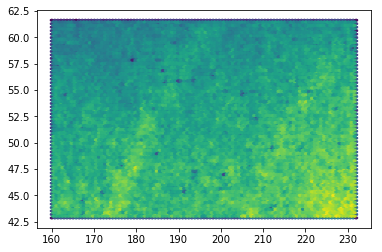

In [52]:
hexbin(base_wise["ra"], base_wise["dec"]);

### Filter the catalogue

Filter the WISE catalogue by selection the area in the field

In [53]:
new_wise = field_full.filter_catalogue(base_wise)

### Transform magnitudes

We will transform the magnitude of the W1 band from Vega to AB magnitudes

In [54]:
new_wise["W1mag"] = new_wise['w1mpro'] + 2.683

### Rename columns

Rename some columns to more common names

In [55]:
new_wise.rename_column("designation", 'AllWISE')
new_wise.rename_column("ra", 'raWise')
new_wise.rename_column("dec", 'decWise')
new_wise.rename_column("sigra", 'raWiseErr')
new_wise.rename_column("sigdec", 'decWiseErr')
new_wise.rename_column('w1sigmpro', "W1magErr")

### Save the data

We will only save the relevant columns to save space.

In [56]:
columns_save = ['AllWISE', 'raWise', 'decWise', 'raWiseErr', 'decWiseErr', 'W1mag', 'W1magErr']

In [ ]:
new_wise[columns_save].write('wise_u1.fits', format="fits")